<a href="https://colab.research.google.com/github/Suhrud1511/DATA-ANALYSIS-USING-CLASSIFICATION-AND-CLUSTTERING-TECHNIQUES/blob/main/DEC_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOUNTING GOOGLE DRIVE


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the required Dependencies 

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA

## **DATA EXPLORATION AND PREPROCESSING**

**EDA**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/HCV-Egy-Data.csv")

In [434]:
data.shape

(1385, 29)

In [435]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [436]:
data.tail()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3
1384,55,2,26,1,2,2,2,1,2,1,...,64,71,34,1190577,628730,5,5,5,13,3


In [437]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [438]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [439]:
data.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [440]:
data.isna().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

SCALING AND DATA CLEANING

In [418]:
# d_scaled=data.drop([  'ALT after 24 w', 'WBC', 'RBC','HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48',  'RNA Base', 'RNA 4', ],axis=1)

MINMAX  SCALER


In [465]:
scaler = MinMaxScaler
cat_cols = ['Age ','Gender', 'Fever', 'Nausea/Vomting','Headache ','Diarrhea ','Fatigue & generalized bone ache ','Jaundice ','Epigastric pain ','ALT after 24 w','WBC', 'RBC','HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48',  'RNA Base', 'RNA 4','RNA 12', 'RNA EOT', 'RNA EF','BMI']
scaler = MinMaxScaler()
data[cat_cols] = scaler.fit_transform(data[cat_cols])

ZSCORE NORMALIZATION

In [442]:
# num_cols = ['Age ', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
# for col in num_cols:
#     data[col] = (data[col] - np.mean(data[col])) / np.std(data[col])

LABEL ENCODER

In [471]:
cat_cols = ['Age ','Gender', 'Fever', 'Nausea/Vomting','Headache ','Diarrhea ','Fatigue & generalized bone ache ','Jaundice ','Epigastric pain ','ALT after 24 w','WBC', 'RBC','HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48',  'RNA Base', 'RNA 4','RNA 12', 'RNA EOT', 'RNA EF','BMI']
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [472]:
data

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,24,0,13,1,0,0,0,1,1,1,...,0,0,0,764,733,369,0,0,13,2
1,14,0,7,0,1,1,0,1,1,0,...,19,85,23,52,619,788,430,36,4,2
2,25,0,11,1,1,1,1,0,0,0,...,0,0,0,660,754,0,914,697,4,4
3,17,1,11,0,1,0,1,0,1,0,...,10,39,12,1188,530,729,931,721,10,3
4,27,0,10,0,0,1,0,1,1,1,...,56,52,9,769,840,1000,432,306,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,12,0,7,0,1,1,1,0,0,0,...,25,6,24,461,74,0,0,0,15,4
1381,23,0,12,0,1,1,0,0,0,0,...,59,26,20,548,212,483,87,291,10,2
1382,10,0,4,1,1,0,0,0,1,0,...,49,1,3,720,668,996,442,192,6,2
1383,20,0,7,1,0,0,1,1,1,0,...,10,43,22,188,104,646,2,866,15,3


In [353]:
data.mean()

Age                                 1.431913e+01
Gender                              4.895307e-01
BMI                                 2.860866e+01
Fever                               5.155235e-01
Nausea/Vomting                      5.025271e-01
Headache                            4.960289e-01
Diarrhea                            5.025271e-01
Fatigue & generalized bone ache     4.989170e-01
Jaundice                            5.010830e-01
Epigastric pain                     5.039711e-01
WBC                                 7.533386e+03
RBC                                 4.422130e+06
HGB                                 1.258773e+01
Plat                                1.583481e+05
AST 1                               8.277473e+01
ALT 1                               8.391625e+01
ALT4                                8.340578e+01
ALT 12                              8.351047e+01
ALT 24                              8.370903e+01
ALT 36                              8.311769e+01
ALT 48              

In [467]:
y = data['Nausea/Vomting' ]
X = data.drop(['Nausea/Vomting' ], axis=1)


In [460]:
X

,Age,Gender,BMI,Fever,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,24,0,13,1,0,0,1,1,1,643,...,0,0,0,764,733,369,0,0,13,2
1,14,0,7,0,1,0,1,1,0,1304,...,19,85,23,52,619,788,430,36,4,2
2,25,0,11,1,1,1,0,0,0,174,...,0,0,0,660,754,0,914,697,4,4
3,17,1,11,0,0,1,0,1,0,502,...,10,39,12,1188,530,729,931,721,10,3
4,27,0,10,0,1,0,1,1,1,104,...,56,52,9,769,840,1000,432,306,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,12,0,7,0,1,1,0,0,0,588,...,25,6,24,461,74,0,0,0,15,4
1381,23,0,12,0,1,0,0,0,0,467,...,59,26,20,548,212,483,87,291,10,2
1382,10,0,4,1,0,0,0,1,0,284,...,49,1,3,720,668,996,442,192,6,2
1383,20,0,7,1,0,1,1,1,0,622,...,10,43,22,188,104,646,2,866,15,3


In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

PREPARING DATASET FOR TRAINING AND TESTING

# **CLASSIFICATION MODEL BUILDING**

**NAIVE BAYES**

0.5010309278350515
[[121 101]
 [141 122]]
              precision    recall  f1-score   support

         0.0       0.46      0.55      0.50       222
         1.0       0.55      0.46      0.50       263

    accuracy                           0.50       485
   macro avg       0.50      0.50      0.50       485
weighted avg       0.51      0.50      0.50       485



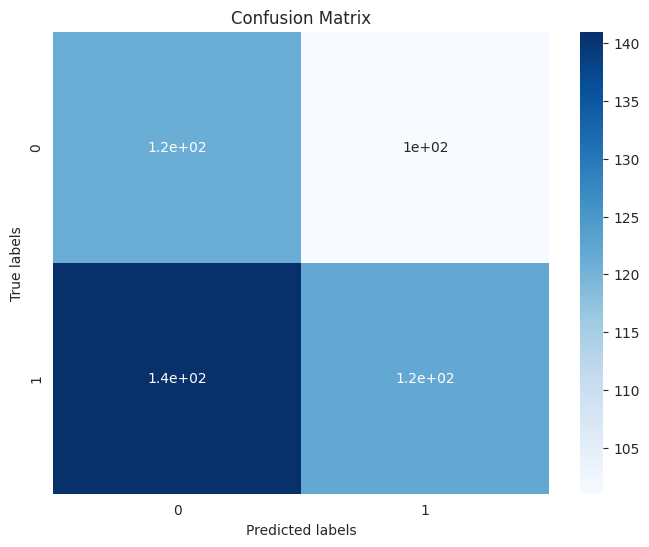

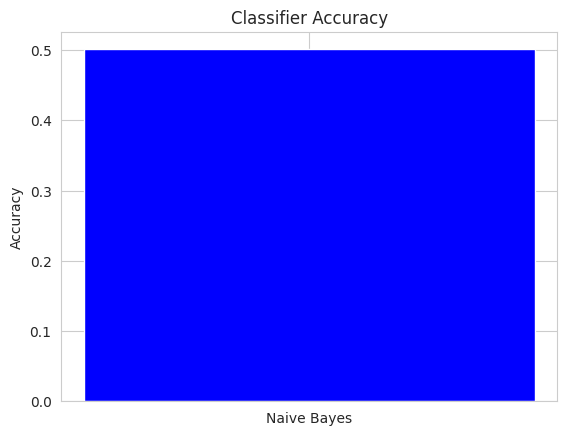

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.55      0.50       222
         1.0       0.55      0.46      0.50       263

    accuracy                           0.50       485
   macro avg       0.50      0.50      0.50       485
weighted avg       0.51      0.50      0.50       485



In [501]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)

# Evaluate the model performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(acc)
print(cm)
print(cr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




classifiers = ['Naive Bayes']
accuracy = [acc]
plt.bar(classifiers, accuracy, color='blue')
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.show()
# Print the classification report
print('Classification Report:')
print(cr)

**Decision trees**

0.5237113402061856


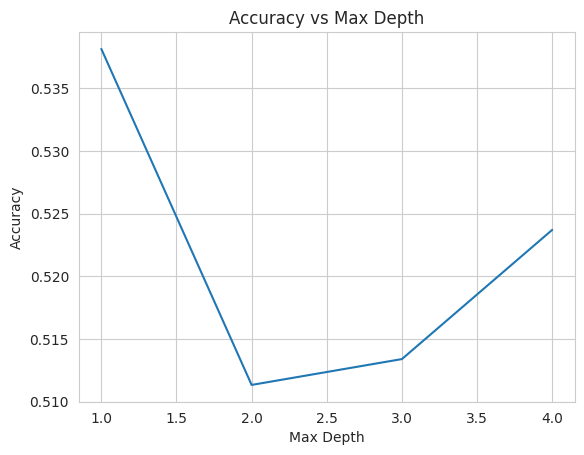

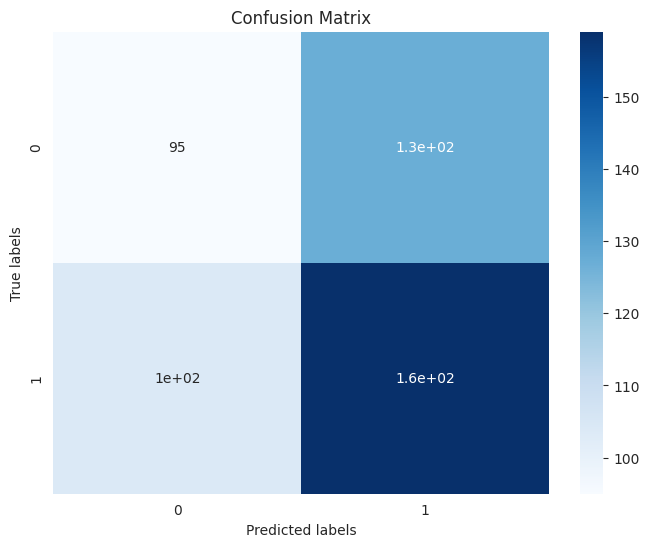

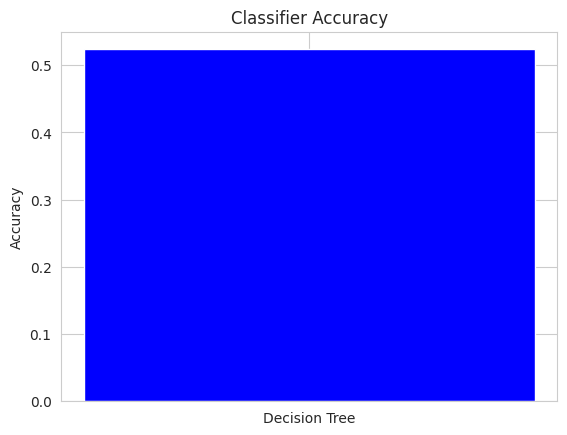

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.43      0.45       222
         1.0       0.56      0.60      0.58       263

    accuracy                           0.52       485
   macro avg       0.52      0.52      0.52       485
weighted avg       0.52      0.52      0.52       485



In [499]:
max_depths = range(1,5)
accuracies = []
for depth in max_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(acc)
# Plot the accuracy graph
plt.plot(max_depths, accuracies)
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

# Calculate accuracy, confusion matrix, and classification report
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




classifiers = ['Decision Tree']
accuracy = [acc]
plt.bar(classifiers, accuracy, color='blue')
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.show()
# Print the classification report
print(f'Classification Report:')
print(cr)

# **CLUSTERING MODEL BUILDING**

**PCA MODEL(PRINCIPAL COMPONENT ANLAYSIS)**

STANDARD SCALING ALL DATA

In [5]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

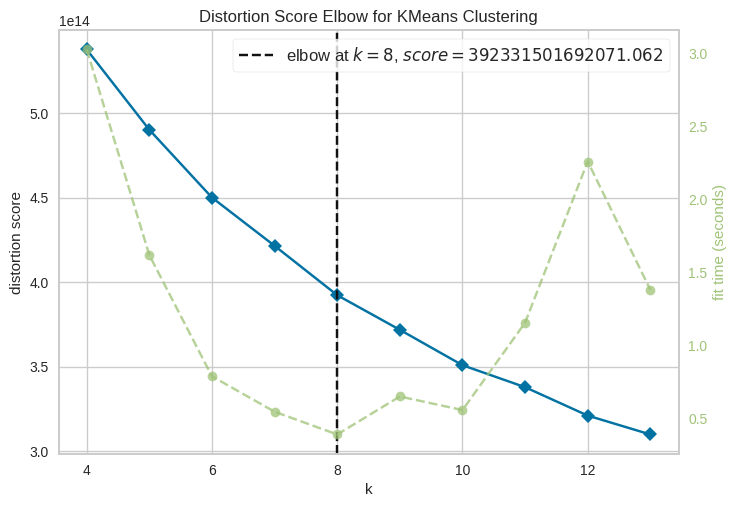

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,14))
visualizer.fit(data)
visualizer.poof()

In [39]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit(data_scale)
data['Cluster'] = clusters.predict(data_scale)
data_scale['Cluster'] = clusters.predict(data_scale)
data_scale['Cluster'].value_counts(sort=True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    210
3    181
1    179
0    170
6    167
2    165
7    159
5    154
Name: Cluster, dtype: int64

In [33]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(data_scale)
pca_x = pca.transform(data_scale)
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']

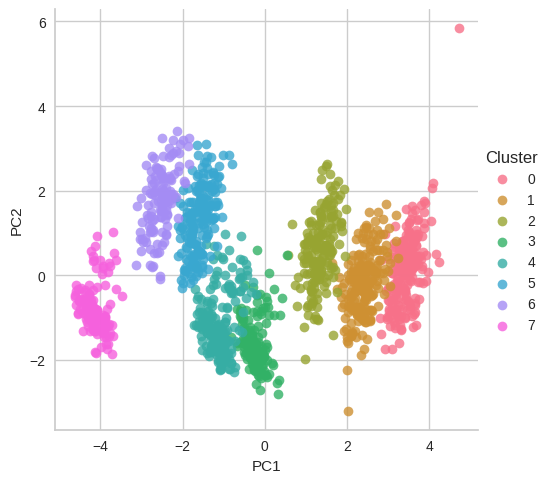

In [34]:
pca_df = pd.concat([pca_df, data_scale['Cluster']], axis=1)
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', fit_reg=False)


In [43]:
data.groupby('Cluster').median()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
Cluster,,,,,,,,,,,,,,,,,,,,,
0,50.0,2.0,25.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,78.0,85.0,35.0,578086.0,544504.0,467855.0,447104.0,530816.5,12.0,3.0
1,51.0,2.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,...,72.0,83.0,34.0,695460.0,795454.0,5.0,5.0,5.0,11.0,2.0
2,45.0,2.0,31.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,73.0,95.0,36.0,581841.0,771905.0,404374.0,424904.0,375288.0,10.0,2.0
3,46.0,1.0,28.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,102.0,86.0,32.0,460257.0,673155.0,5.0,5.0,5.0,11.0,3.0
4,43.0,1.5,30.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,104.5,75.5,35.0,639438.0,625803.5,429318.5,479823.5,479889.0,9.0,3.0
5,46.0,2.0,28.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,...,66.5,82.0,33.0,601705.5,307250.5,5.0,5.0,5.0,8.0,3.0
6,46.0,1.0,29.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,63.0,104.0,34.0,586100.0,538635.0,474974.0,338544.0,402753.0,8.0,3.0
7,47.0,1.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,103.0,69.0,28.0,598473.0,543623.0,428729.0,386827.0,389341.0,10.0,2.0


In [46]:
data_scale

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Cluster
0,1.102814,-0.979276,1.568525,0.969420,-1.005067,-0.992089,-1.005067,1.002168,0.997836,0.992089,...,-2.999471,-4.021808,0.181960,0.092882,-0.001962,-1.087692,-1.088823,0.805050,-0.478562,5
1,-0.036355,-0.979276,0.096039,-1.031544,0.994959,1.007974,-1.005067,1.002168,0.997836,-1.007974,...,1.501857,1.493666,-1.555454,-0.171903,1.221053,0.185824,-0.972681,-1.432396,-0.478562,6
2,1.216730,-0.979276,1.077696,0.969420,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,-2.999471,-4.021808,-0.055972,0.166905,-1.012273,1.695069,0.999427,-1.432396,1.305579,6
3,0.305396,1.021163,1.077696,-1.031544,0.994959,-0.992089,0.994959,-0.997836,0.997836,-1.007974,...,-0.252898,-0.061981,1.274675,-0.416795,1.040971,1.727277,1.087139,0.059234,0.413509,0
4,1.444564,-0.979276,0.832282,-1.031544,-1.005067,1.007974,-1.005067,1.002168,0.997836,0.992089,...,0.243011,-0.486248,0.196318,0.380636,12.069419,0.193923,-0.181303,0.307840,-1.370633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,-0.264188,-0.979276,0.096039,-1.031544,0.994959,1.007974,0.994959,-0.997836,-1.002168,-1.007974,...,-1.511744,1.635088,-0.574200,-1.504642,-1.012273,-1.087692,-1.088823,1.302260,1.305579,5
1381,0.988897,-0.979276,1.323110,-1.031544,0.994959,1.007974,-1.005067,-0.997836,-1.002168,-1.007974,...,-0.748807,1.069398,-0.309697,-1.236759,0.366648,-0.809510,-0.205921,0.059234,-0.478562,5
1382,-0.492022,-0.979276,-0.640203,0.969420,0.994959,-0.992089,-1.005067,-0.997836,0.997836,-1.007974,...,-1.702479,-1.334782,0.061369,-0.077694,1.813706,0.211971,-0.489235,-0.935186,-0.478562,6
1383,0.647146,-0.979276,0.096039,0.969420,-1.005067,-0.992089,0.994959,1.002168,0.997836,-1.007974,...,-0.100311,1.352243,-1.274928,-1.448806,0.795717,-1.078409,1.512293,1.302260,0.413509,0


## **The Kmeans model classified patients to 8 groups of various symptoms.**




1.   Cluster 0 : Men with fever, headache, diarrhea, fatigue and epigastric pain
2. Cluster 1 : Men with headache, fatigue, jaundice and epigastric pain
3. Cluster 2 : Women with fever, diarrhea, fatigue and jaundice
4. Cluster 3 : Women with fever and nausea/vomiting
5. Cluster 4 : Men with headache, fatigue, jaundice and epigastric pain
6. Cluster 5 : Men with fever, nausea/vomiting and headache
7. Cluster 6 : Women and men with fever and epigastric pain
8. Cluster 7 : Men with nausea/vomiting, headache, diarrhea and jaundice






# LINEAR REG FOR REF

Linear reg


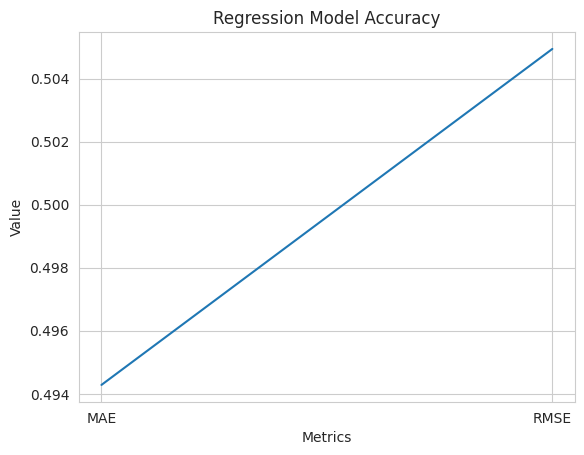

MAE: 0.4942825416308318
RMSE: 0.5049386795905109


In [494]:
# Initialize the linear regression model
reg = LinearRegression()

# Train the model on the training set
reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plot the accuracy graph
plt.plot(['MAE', 'RMSE'], [mae, rmse])
plt.title('Regression Model Accuracy')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()
print('MAE:',mae)
print('RMSE:',rmse)